In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from math import pi


In [2]:
# read all data

games = pd.read_csv('games.csv')
games.drop_duplicates(inplace=True, subset=['GAME_ID'])
games_details = pd.read_csv('games_details.csv')
players = pd.read_csv('players.csv')
ranking = pd.read_csv('ranking.csv')
teams = pd.read_csv('teams.csv')
reg_15 = pd.read_csv('reg_2015.csv')
reg_15.dropna(inplace = True)

In [3]:
# grab the sample 5 teams from western conference
teams_5_abb = ['GSW', 'LAC', 'HOU', 'NOP', 'LAL']
teams_5_id = teams[teams['ABBREVIATION'].isin(teams_5_abb)][['ABBREVIATION', 'TEAM_ID']].reset_index(drop=True)

NOP = 1610612740
HOU = 1610612745
LAC = 1610612746
LAL = 1610612747
GSW = 1610612744

teams_5 = [GSW, LAC, HOU, NOP, LAL]

# 1. Variable Statistics, Correlation

In [4]:
reg_15.describe()
# dependent variable is 60% : 1, 40% : 0. 
# Not that biased

,GAME_ID,SEASON,HOME_TEAM_ID,VISITOR_TEAM_ID,HOME_TEAM_WINS,home_rate,away_rate,home_over_overall,away_over_overall,win_avg5_home,Offensive_efficiency_avg5_home,Defensive_efficiency_avg5_home,win_avg5_away,Offensive_efficiency_avg5_away,Defensive_efficiency_avg5_away,elo_home,elo_away
count,1.152000e+03,1152.0,1.152000e+03,1.152000e+03,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,2.150065e+07,2015.0,1.610613e+09,1.610613e+09,0.598090,0.578338,0.422367,1.170814,0.820354,0.500521,1.057234,1.056525,0.500174,1.056806,1.056773,1499.251908,1500.602766
std,3.327417e+02,0.0,8.658238e+00,8.646770e+00,0.490497,0.214150,0.189046,0.258692,0.232380,0.251494,0.059065,0.056069,0.259519,0.058299,0.055573,86.581922,86.024139
min,2.150007e+07,2015.0,1.610613e+09,1.610613e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.891130,0.870613,0.000000,0.853886,0.875838,1237.054839,1239.528911
25%,2.150037e+07,2015.0,1.610613e+09,1.610613e+09,0.000000,0.457143,0.312500,1.090797,0.730366,0.400000,1.016005,1.016502,0.400000,1.018135,1.018573,1454.669846,1454.506892
50%,2.150065e+07,2015.0,1.610613e+09,1.610613e+09,1.000000,0.600000,0.428571,1.176521,0.832185,0.600000,1.056162,1.056945,0.400000,1.054900,1.060923,1500.693447,1503.561468
75%,2.150094e+07,2015.0,1.610613e+09,1.610613e+09,1.000000,0.688039,0.524107,1.274226,0.916667,0.600000,1.097655,1.094969,0.600000,1.095986,1.096800,1539.712774,1541.857861
max,2.150123e+07,2015.0,1.610613e+09,1.610613e+09,1.000000,1.000000,1.000000,2.500000,2.500000,1.000000,1.233405,1.256493,1.000000,1.262311,1.213918,1767.623551,1763.739266


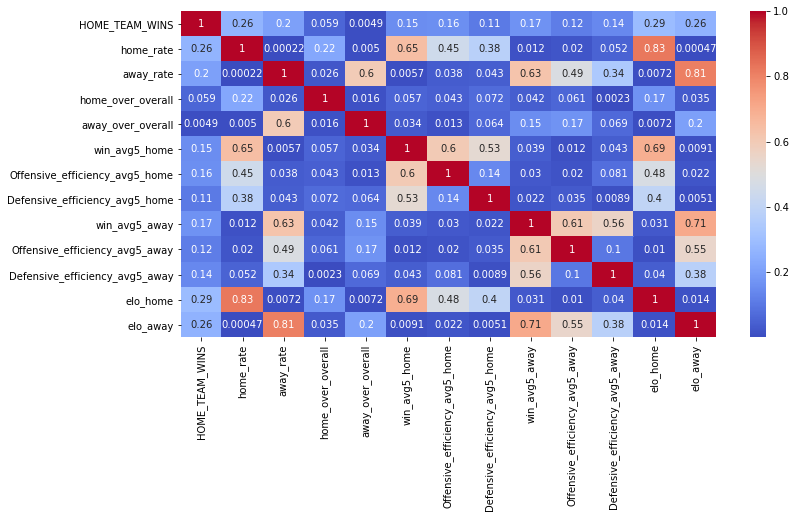

In [5]:
# plot correlation heatmap
# home variables are correlated to each other
# away variables are corelated to each other
# dependent variable is not highly correlated to one variable: but this is probably because home team and away team's variables should be compared - you can't predict the winner with one team's data

corrs = reg_15[['HOME_TEAM_WINS', 'home_rate', 'away_rate', 'home_over_overall', 'away_over_overall', 'win_avg5_home',
       'Offensive_efficiency_avg5_home', 'Defensive_efficiency_avg5_home',
       'win_avg5_away', 'Offensive_efficiency_avg5_away',
       'Defensive_efficiency_avg5_away', 'elo_home', 'elo_away']].corr()

plt.figure(figsize = (12,6))
sns.heatmap(abs(corrs), annot=True, cmap = 'coolwarm')
plt.show()

# 2. Draw Distributions of Features (Independednt Variables)

Plotting Functions

In [6]:
%matplotlib inline
COL_NUM = 3
ROW_NUM = 2

def draw1(var, title, xlim, home):
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,10))
    fig.suptitle(title, fontsize = 16)
    
    for i, team in enumerate(teams_5):
        ax = axes[int(i/COL_NUM), i%COL_NUM]
        if home:
            sns.distplot(reg_15[reg_15['HOME_TEAM_ID'] == team][var], ax=ax, norm_hist = True)
        else: 
            sns.distplot(reg_15[reg_15['VISITOR_TEAM_ID'] == team][var], ax=ax, norm_hist = True)
        ax.set_title(teams_5_id[teams_5_id['TEAM_ID'] == team]['ABBREVIATION'].values[0])
        ax.set_xlim(xlim)


def draw2(var, title, xlim):
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,10))
    fig.suptitle(title, fontsize = 16)
    
    for i, team in enumerate(teams_5):
        ax = axes[int(i/COL_NUM), i%COL_NUM]
        df_home = reg_15[reg_15['HOME_TEAM_ID'] == team][['HOME_TEAM_ID',var+'_home']].rename(columns = {'HOME_TEAM_ID':'TEAM_ID', var+'_home':var})
        df_away = reg_15[reg_15['VISITOR_TEAM_ID'] == team][['VISITOR_TEAM_ID',var+'_away']].rename(columns = {'VISITOR_TEAM_ID':'TEAM_ID', var+'_away':var})
        df = pd.concat([df_home, df_away], ignore_index = True)
        
        sns.distplot(df[df['TEAM_ID'] == team][var], ax=ax, norm_hist = True)
        ax.set_title(teams_5_id[teams_5_id['TEAM_ID'] == team]['ABBREVIATION'].values[0])
        ax.set_xlim(xlim)
        

Plot distribution of each feature

C:\Users\sohnh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


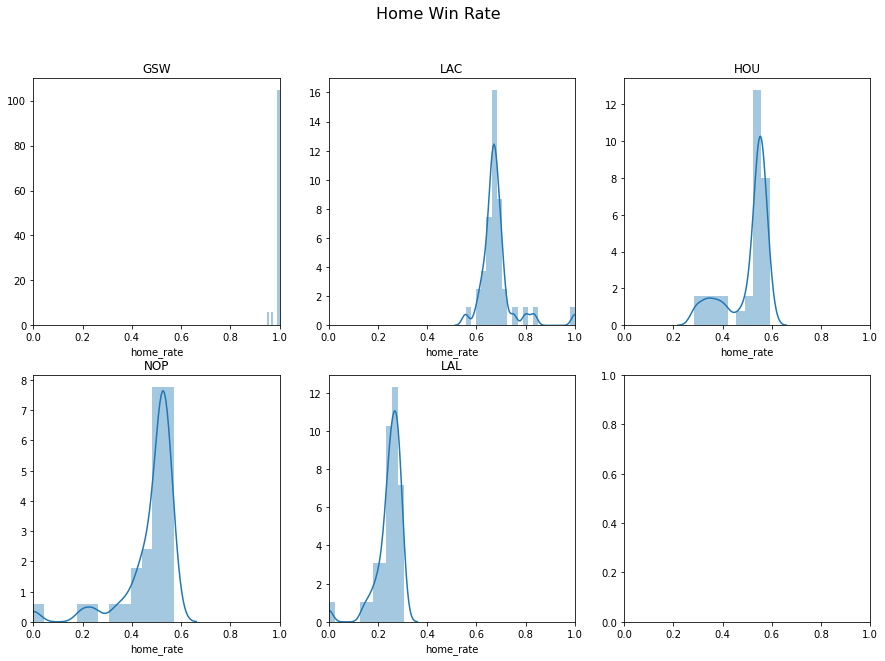

In [7]:
# home win rate
draw1('home_rate', 'Home Win Rate', [0,1], True)

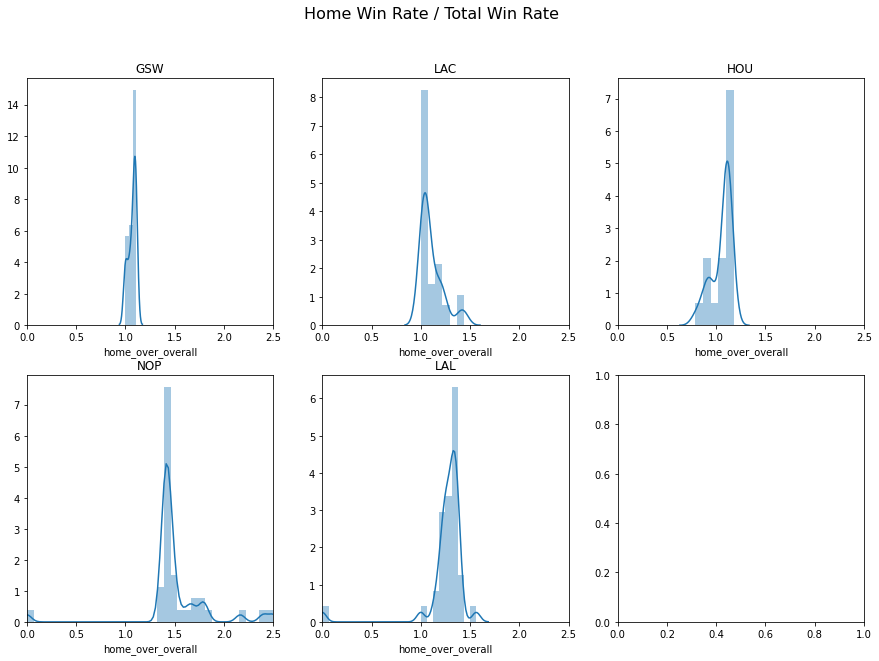

In [8]:
# home over overall win rate
draw1('home_over_overall', 'Home Win Rate / Total Win Rate', [0,2.5], True)

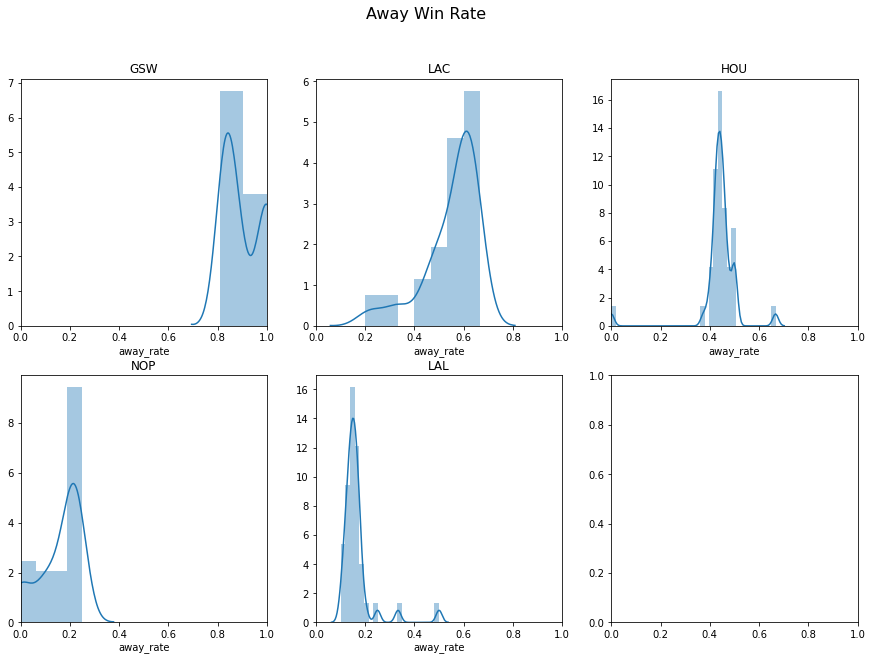

In [9]:
# away win rate
draw1('away_rate', 'Away Win Rate', [0,1], False)

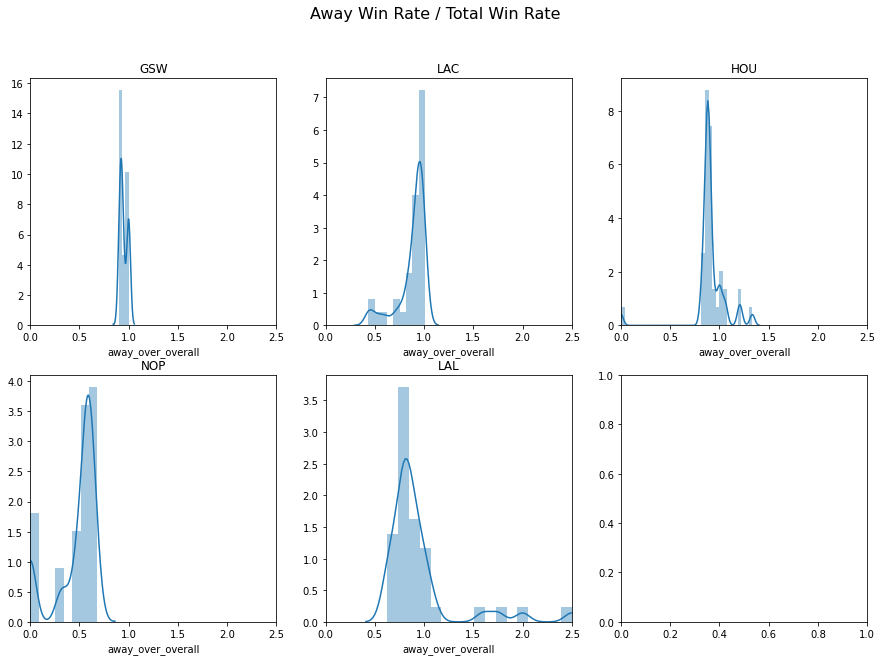

In [10]:
# away over overall win rate
draw1('away_over_overall', 'Away Win Rate / Total Win Rate', [0,2.5], False)


C:\Users\sohnh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


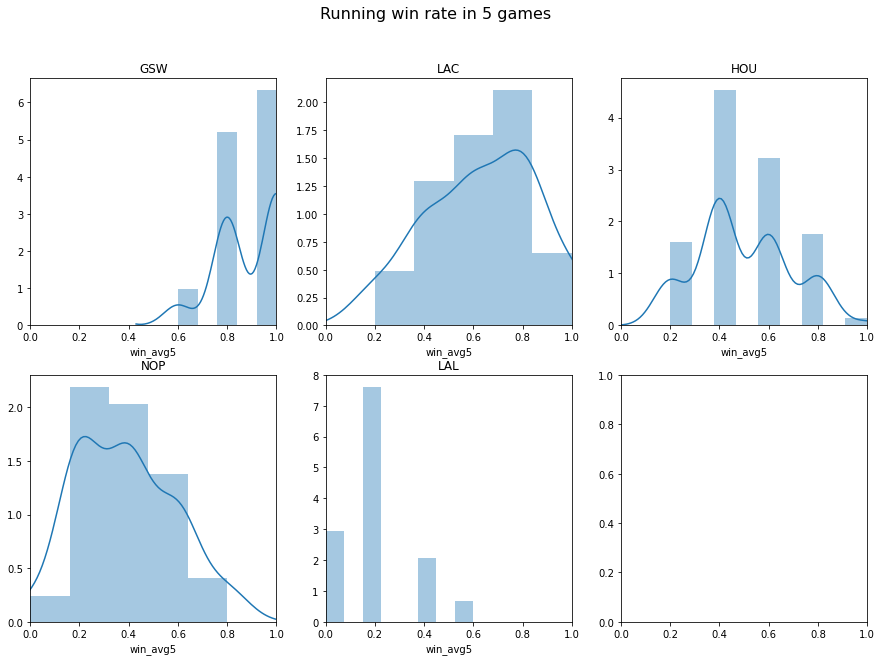

In [11]:
# win_avg5 (momentum)
draw2('win_avg5', 'Running win rate in 5 games', [0,1])

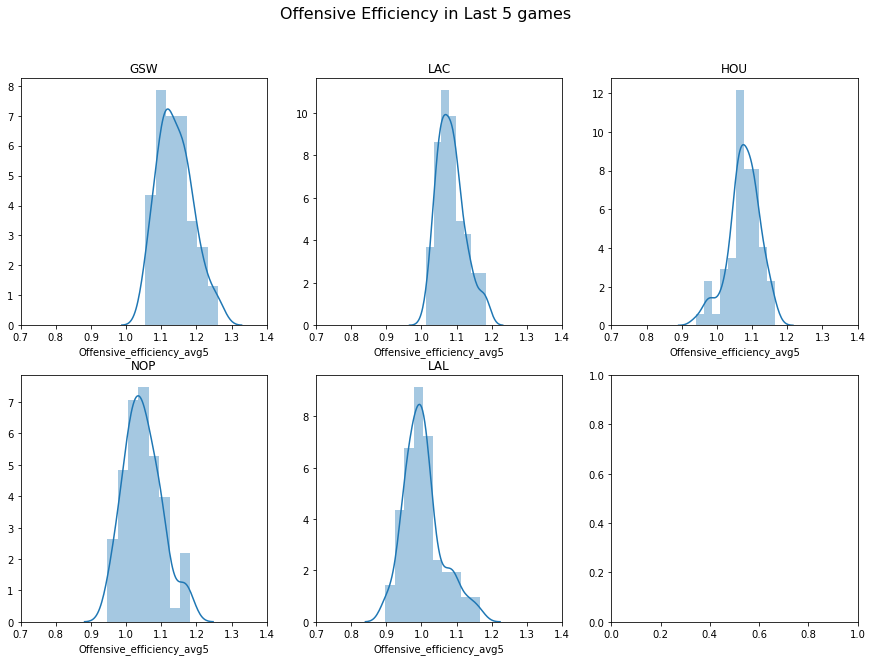

In [12]:
# Offensive Efficiency
draw2('Offensive_efficiency_avg5', 'Offensive Efficiency in Last 5 games', [0.7,1.4])

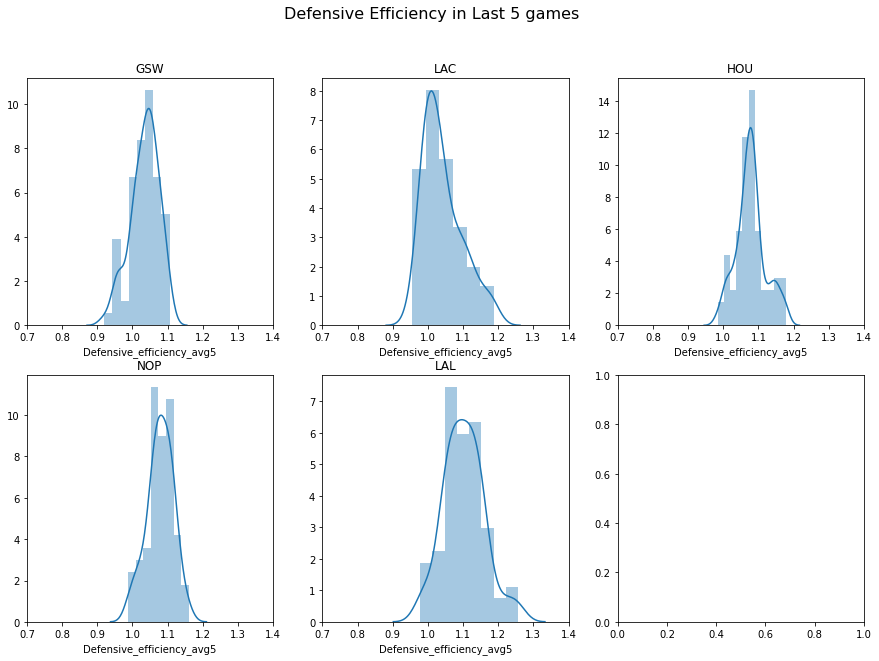

In [13]:
# Defensive Efficiency
draw2('Defensive_efficiency_avg5', 'Defensive Efficiency in Last 5 games', [0.7,1.4])

# 3. Time Series Analysis

C:\Users\sohnh\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\sohnh\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\sohnh\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\sohnh\anaconda3\lib

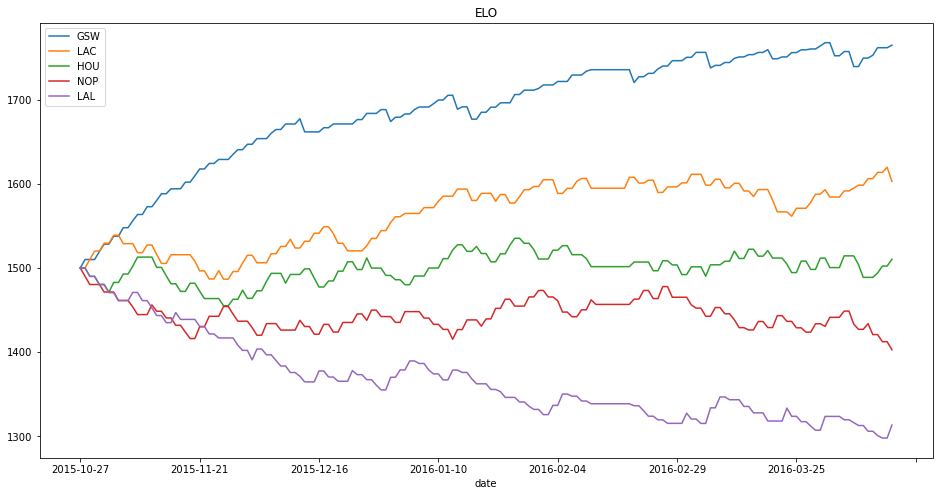

In [14]:
# ELO
def elo_plot():
    elo_2015 = pd.read_csv('elo_2015.csv')
    l = ['gsw', 'lac', 'hou', 'nop', 'lal']
    m = ['GSW', 'LAC', 'HOU', 'NOP', 'LAL']
    for i, j in zip(l,m) :
        elo_team = 'elo_2015' + '_' + i
        elo_team = elo_2015.loc[elo_2015['ABBREVIATION'].isin([j])]
        elo_team.drop('TEAM_ID', inplace=True, axis=1)
        elo_team.set_index('date',inplace=True)
        elo_team['rating'].plot(label=j, figsize=(16,8), title='ELO')
        plt.legend()
elo_plot()

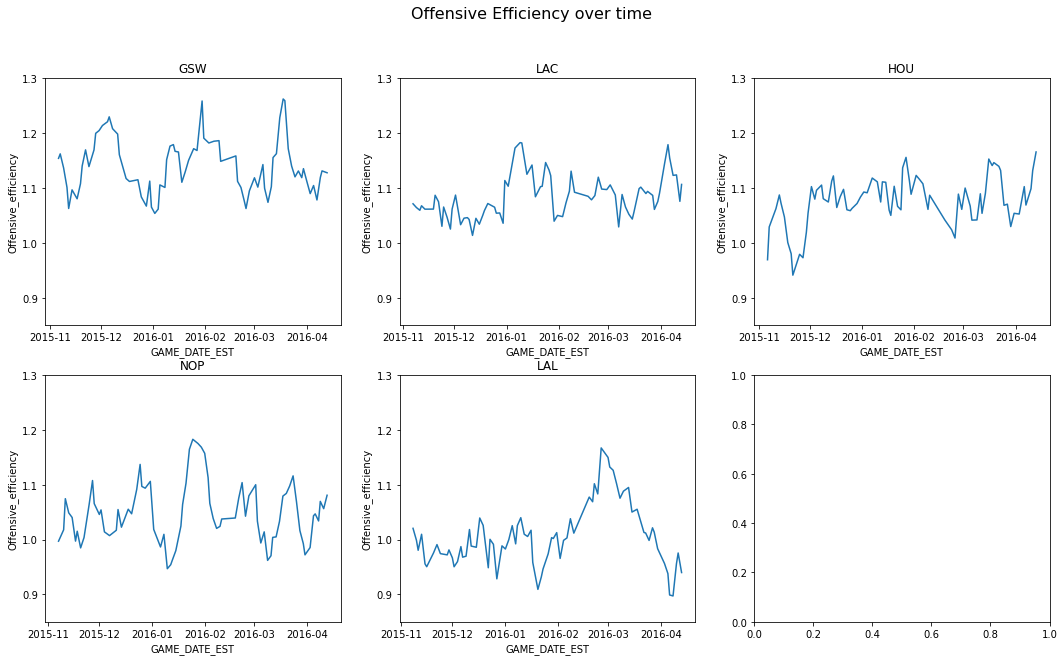

In [15]:
# Offensive Efficiency
reg_15['GAME_DATE_EST'] = pd.to_datetime(reg_15['GAME_DATE_EST'])

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(18,10))
fig.suptitle('Offensive Efficiency over time', fontsize = 16)

def plot_offensive_efficiency():
    team_ids = [1610612744,1610612746,1610612745,1610612740,1610612747]
    team_names = ['GSW','LAC','HOU', 'NOP','LAL']
    i = 0
    for i, team_id in enumerate(team_ids):
        ax = axes[int(i/COL_NUM), i%COL_NUM]
        team_name = team_names[i]

        team_home = reg_15[reg_15['HOME_TEAM_ID'] == team_id][['GAME_DATE_EST', 'HOME_TEAM_ID','Offensive_efficiency_avg5_home', 'Defensive_efficiency_avg5_home', 'win_avg5_home', 'home_rate']].rename(columns = {'HOME_TEAM_ID':'TEAM_ID', 'Offensive_efficiency_avg5_home':'Offensive_efficiency_avg5', 'Defensive_efficiency_avg5_home':'Defensive_efficiency_avg5', 'win_avg5_home':'win_avg5'})
        team_away = reg_15[reg_15['VISITOR_TEAM_ID'] == team_id][['GAME_DATE_EST', 'VISITOR_TEAM_ID','Offensive_efficiency_avg5_away', 'Defensive_efficiency_avg5_away', 'win_avg5_away', 'away_rate']].rename(columns = {'VISITOR_TEAM_ID':'TEAM_ID', 'Offensive_efficiency_avg5_away':'Offensive_efficiency_avg5', 'Defensive_efficiency_avg5_away':'Defensive_efficiency_avg5', 'win_avg5_away':'win_avg5'})

        team_all = pd.concat([team_home.copy().drop(columns = 'home_rate'),team_away.copy().drop(columns = 'away_rate')],ignore_index = True)    
        team_all['month'] = team_all['GAME_DATE_EST'].dt.month
        
        sns.lineplot(data = team_all, x = 'GAME_DATE_EST', y = 'Offensive_efficiency_avg5', ax=ax)
        ax.set_title(team_name)
        ax.set_ylim(0.85,1.3)
        ax.set_ylabel('Offensive_efficiency')

plot_offensive_efficiency()

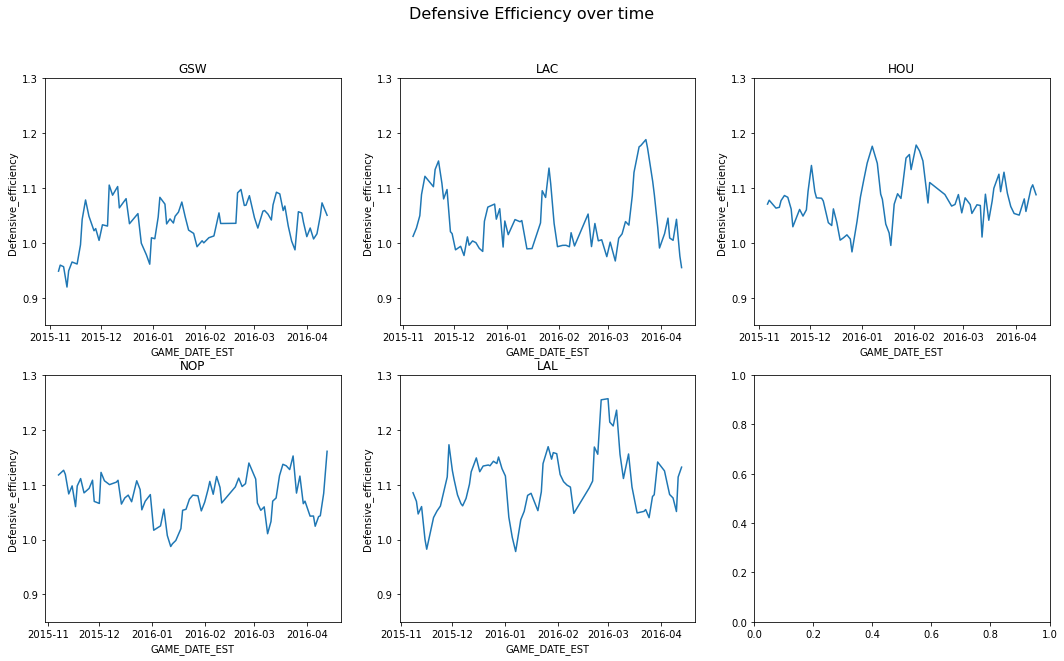

In [16]:
# Defensive Efficiency

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(18,10))
fig.suptitle('Defensive Efficiency over time', fontsize = 16)

def plot_defensive_efficiency():
    team_ids = [1610612744,1610612746,1610612745,1610612740,1610612747]
    team_names = ['GSW','LAC','HOU', 'NOP','LAL']
    i = 0
    for i, team_id in enumerate(team_ids):
        ax = axes[int(i/COL_NUM), i%COL_NUM]
        team_name = team_names[i]

        team_home = reg_15[reg_15['HOME_TEAM_ID'] == team_id][['GAME_DATE_EST', 'HOME_TEAM_ID','Offensive_efficiency_avg5_home', 'Defensive_efficiency_avg5_home', 'win_avg5_home', 'home_rate']].rename(columns = {'HOME_TEAM_ID':'TEAM_ID', 'Offensive_efficiency_avg5_home':'Offensive_efficiency_avg5', 'Defensive_efficiency_avg5_home':'Defensive_efficiency_avg5', 'win_avg5_home':'win_avg5'})
        team_away = reg_15[reg_15['VISITOR_TEAM_ID'] == team_id][['GAME_DATE_EST', 'VISITOR_TEAM_ID','Offensive_efficiency_avg5_away', 'Defensive_efficiency_avg5_away', 'win_avg5_away', 'away_rate']].rename(columns = {'VISITOR_TEAM_ID':'TEAM_ID', 'Offensive_efficiency_avg5_away':'Offensive_efficiency_avg5', 'Defensive_efficiency_avg5_away':'Defensive_efficiency_avg5', 'win_avg5_away':'win_avg5'})

        team_all = pd.concat([team_home.copy().drop(columns = 'home_rate'),team_away.copy().drop(columns = 'away_rate')],ignore_index = True)    
        team_all['month'] = team_all['GAME_DATE_EST'].dt.month
        sns.lineplot(data = team_all, x = 'GAME_DATE_EST', y = 'Defensive_efficiency_avg5', ax=ax)
        ax.set_title(team_name)
        ax.set_ylim(0.85,1.3)
        ax.set_ylabel('Defensive_efficiency')
    
plot_defensive_efficiency()

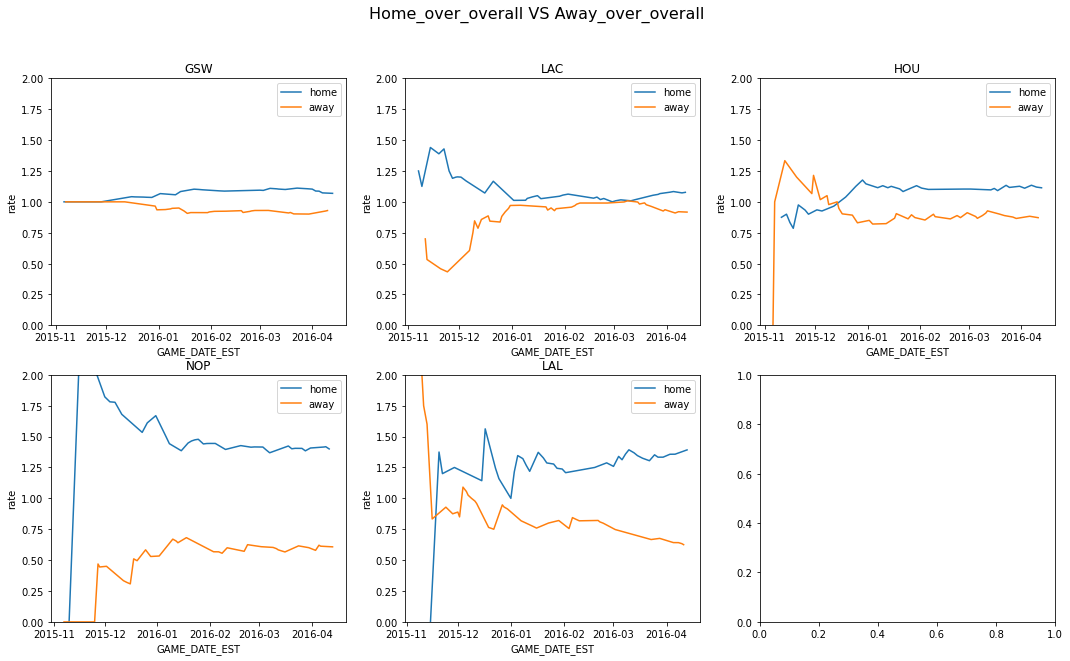

In [17]:
# Home_over_overall VS Away_over_overall
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(18,10))
fig.suptitle('Home_over_overall VS Away_over_overall', fontsize = 16)

def plot_home_away_rate():
    team_ids = [1610612744,1610612746,1610612745,1610612740,1610612747]
    team_names = ['GSW','LAC','HOU', 'NOP','LAL']
    i = 0
    for i, team_id in enumerate(team_ids):
        ax = axes[int(i/COL_NUM), i%COL_NUM]
        team_name = team_names[i]

        team_home = reg_15[reg_15['HOME_TEAM_ID'] == team_id][['GAME_DATE_EST', 'HOME_TEAM_ID','Offensive_efficiency_avg5_home', 'Defensive_efficiency_avg5_home', 'win_avg5_home', 'home_over_overall']].rename(columns = {'HOME_TEAM_ID':'TEAM_ID', 'Offensive_efficiency_avg5_home':'Offensive_efficiency_avg5', 'Defensive_efficiency_avg5_home':'Defensive_efficiency_avg5', 'win_avg5_home':'win_avg5'})
    
        sns.lineplot(data = team_home, x = 'GAME_DATE_EST', y = 'home_over_overall', ax=ax, label = 'home')
        ax.legend()
        
        team_away = reg_15[reg_15['VISITOR_TEAM_ID'] == team_id][['GAME_DATE_EST', 'VISITOR_TEAM_ID','Offensive_efficiency_avg5_away', 'Defensive_efficiency_avg5_away', 'win_avg5_away', 'away_over_overall']].rename(columns = {'VISITOR_TEAM_ID':'TEAM_ID', 'Offensive_efficiency_avg5_away':'Offensive_efficiency_avg5', 'Defensive_efficiency_avg5_away':'Defensive_efficiency_avg5', 'win_avg5_away':'win_avg5'})

        sns.lineplot(data = team_away, x = 'GAME_DATE_EST', y = 'away_over_overall', ax=ax, label = 'away')
        ax.set_title(team_name)
        ax.set_ylabel('rate')
        ax.set_ylim(0,2)
        ax.legend()
        
plot_home_away_rate()

# 4. Player Stats

Stephen Curry vs Average of all players

In [18]:
steph_curry_stats = games_details[games_details['PLAYER_NAME'] == 'Stephen Curry'].iloc[:,9:]
steph_curry_stats.dropna(inplace = True)
steph_curry_stats_pct = steph_curry_stats[['FG_PCT','FG3_PCT', 'FT_PCT']]
steph_curry_stats_other = steph_curry_stats[['AST','REB', 'BLK', 'PTS', 'STL']]
all_players_stats = games_details[games_details['PLAYER_NAME'] != 'Stephen Curry'].iloc[:,9:]
all_players_stats.dropna(inplace = True)
all_players_stats_pct = all_players_stats[['FG_PCT','FG3_PCT', 'FT_PCT']]
all_players_stats_other = all_players_stats[['AST','REB', 'BLK', 'PTS', 'STL']]

In [19]:
column_names = ['FG_PCT','FG3_PCT', 'FT_PCT']
column_names_other = ['AST','REB', 'BLK', 'PTS', 'STL']
steph_curry_df = []
all_players_df = []
for i in column_names:
    steph_curry_df.append(steph_curry_stats_pct[i].agg('mean'))
    all_players_df.append(all_players_stats_pct[i].agg('mean'))
    
df_player_comparision_pct = pd.DataFrame({'Stephen Curry':steph_curry_df, 'All Players':all_players_df}).T
df_player_comparision_pct.columns = column_names

In [20]:
steph_curry_df_other = []
all_players_df_other = []
for i in column_names_other:
    steph_curry_df_other.append(steph_curry_stats_other[i].agg('mean'))
    all_players_df_other.append(all_players_stats_other[i].agg('mean'))
df_player_comparision_other = pd.DataFrame({'Stephen Curry':steph_curry_df_other, 'All Players':all_players_df_other}).T
df_player_comparision_other.columns = column_names_other

In [21]:
#Inspired from https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals

def radar_plot(ax, df, max_val=1):
    # number of variables
    categories=list(df)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    yticks = [max_val*i/4 for i in range(1,4)]
    plt.yticks(yticks, [str(e) for e in yticks], color="grey", size=10)
    plt.ylim(0,max_val)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    colors = ['b','r','g']
    for i in range(len(df)):
        values = df.values[i].flatten().tolist()
        values += values[:1]
        color = colors[i]

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid', color=color, label=df.index[i])

        # Fill area
        ax.fill(angles, values, color, alpha=0.1)
     
    # Add legend
    plt.legend(loc=0, bbox_to_anchor=(0.1, 0.1), prop={'size': 13})

#### Stats comparison between Stephen Curry and the rest of the league

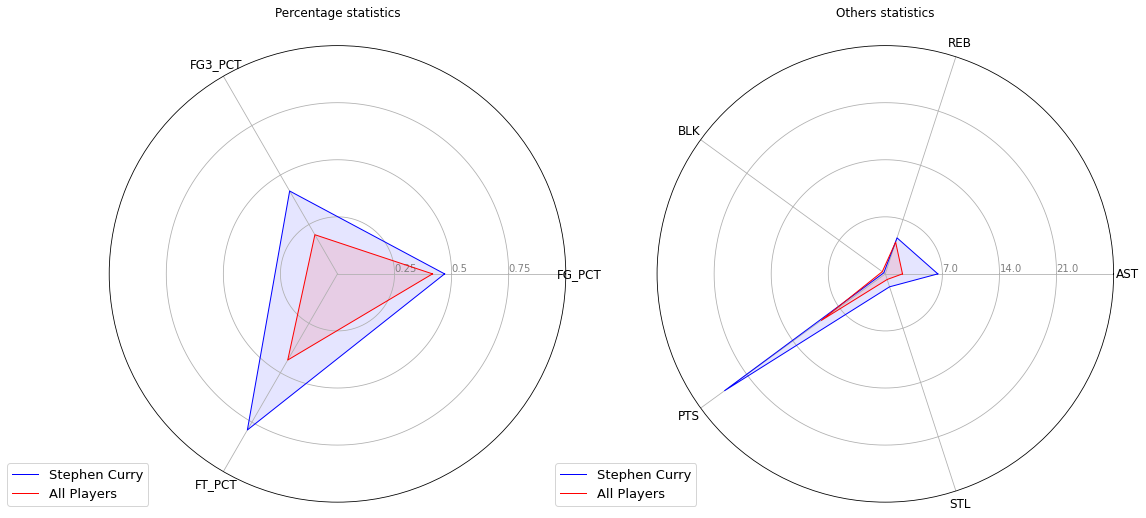

In [22]:
display(Markdown('#### Stats comparison between Stephen Curry and the rest of the league'))
fig, ax = plt.subplots(figsize=(18, 9))

ax = plt.subplot(121, polar=True)
ax.set_title('Percentage statistics')
radar_plot(ax=ax, df=df_player_comparision_pct, max_val=1)

ax = plt.subplot(122, polar=True)
ax.set_title('Others statistics')
radar_plot(ax=ax, df=df_player_comparision_other, max_val=28)

plt.show()


Stephen Curry vs LeBron James

In [23]:
Lebron_stats = games_details[games_details['PLAYER_NAME'] == 'LeBron James'].iloc[:,9:]
Lebron_stats.dropna(inplace = True)
Lebron_stats_pct = Lebron_stats[['FG_PCT','FG3_PCT', 'FT_PCT']]
Lebron_stats_other = Lebron_stats[['AST','REB', 'BLK', 'PTS', 'STL']]

In [24]:
Lebron_df = []
for i in column_names:
    Lebron_df.append(Lebron_stats_pct[i].agg('mean'))
    
df_player_comparision_pct = pd.DataFrame({'Stephen Curry':steph_curry_df, 'LeBron James':Lebron_df}).T
df_player_comparision_pct.columns = column_names

In [25]:
Lebron_df_other = []
for i in column_names_other:
    Lebron_df_other.append(Lebron_stats_other[i].agg('mean'))
df_player_comparision_other = pd.DataFrame({'Stephen Curry':steph_curry_df_other, 'LeBron James':Lebron_df_other}).T
df_player_comparision_other.columns = column_names_other

#### Stats comparison between Stephen Curry and LeBron James

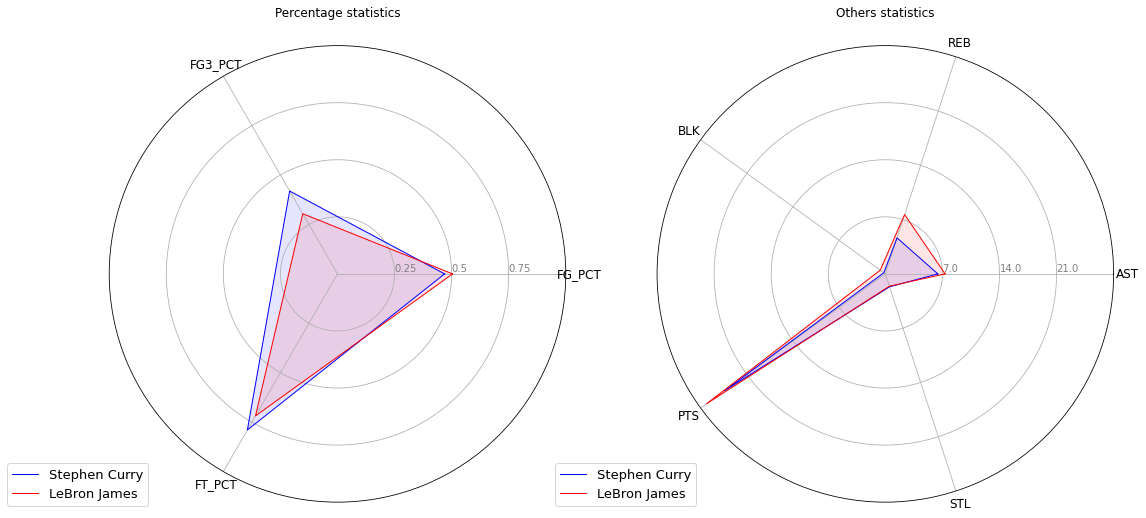

In [26]:
display(Markdown('#### Stats comparison between Stephen Curry and LeBron James'))
fig, ax = plt.subplots(figsize=(18, 9))

ax = plt.subplot(121, polar=True)
ax.set_title('Percentage statistics')
radar_plot(ax=ax, df=df_player_comparision_pct, max_val=1)

ax = plt.subplot(122, polar=True)
ax.set_title('Others statistics')
radar_plot(ax=ax, df=df_player_comparision_other, max_val=28)

plt.show()
